In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.shape

(8807, 12)

In [15]:
# Replacments

df['country'] = df['country'].fillna(df['country'].mode()[0])


df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

C:\Users\thiag\AppData\Local\Temp\ipykernel_416\97789537.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].replace(np.nan, 'No Data',inplace  = True)
C:\Users\thiag\AppData\Local\Temp\ipykernel_416\97789537.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [16]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [20]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021


In [21]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8790, dtype: bool

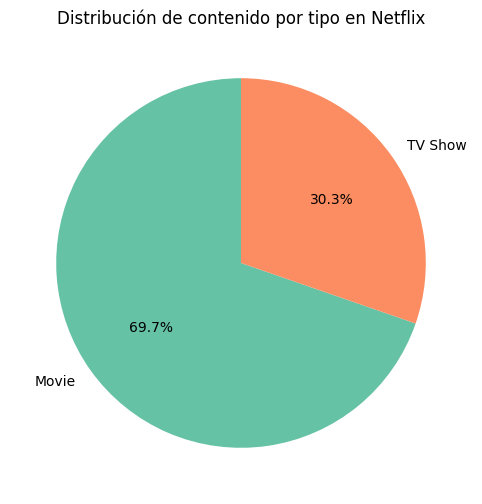

In [36]:
count_type = df['type'].value_counts()
count_type

# Crear un gráfico de pastel para visualizar
plt.figure(figsize=(8, 6))
count_type.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribución de contenido por tipo en Netflix')
plt.ylabel('')  # Quitar la etiqueta del eje Y
plt.show()

listed_in
International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1349
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      573
Crime TV Shows                   469
Kids' TV                         448
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     174
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows             

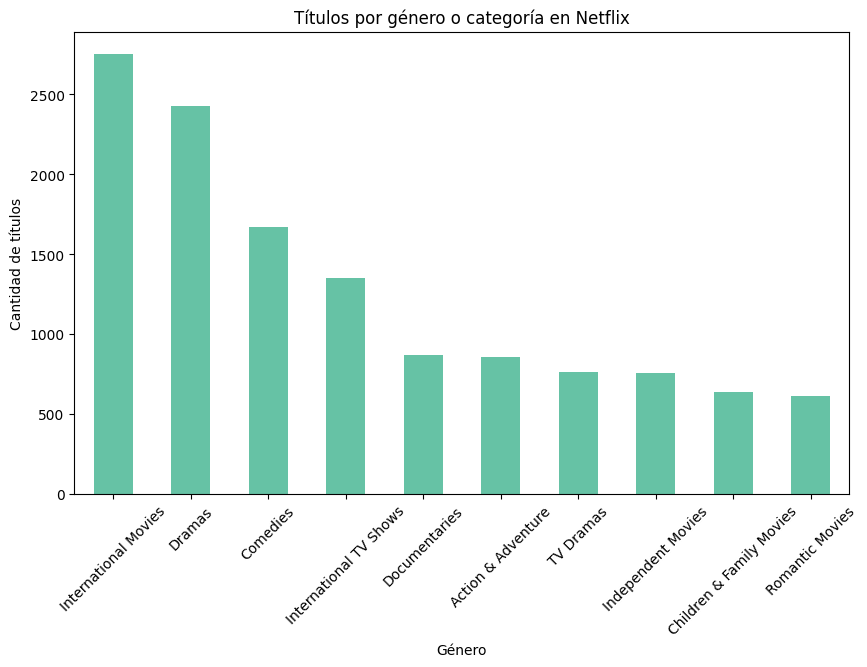

In [44]:
separar_generos = df['listed_in'].str.split(', ').explode()

generos = separar_generos.value_counts()

print(generos)

plt.figure(figsize=(10, 6))
generos.head(10).plot(kind='bar', color='#66c2a5')
plt.title('Títulos por género o categoría en Netflix')
plt.xlabel('Género')
plt.ylabel('Cantidad de títulos')
plt.xticks(rotation=45)
plt.show()

country
United States     4509
India             1046
United Kingdom     803
Canada             445
France             393
Japan              316
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


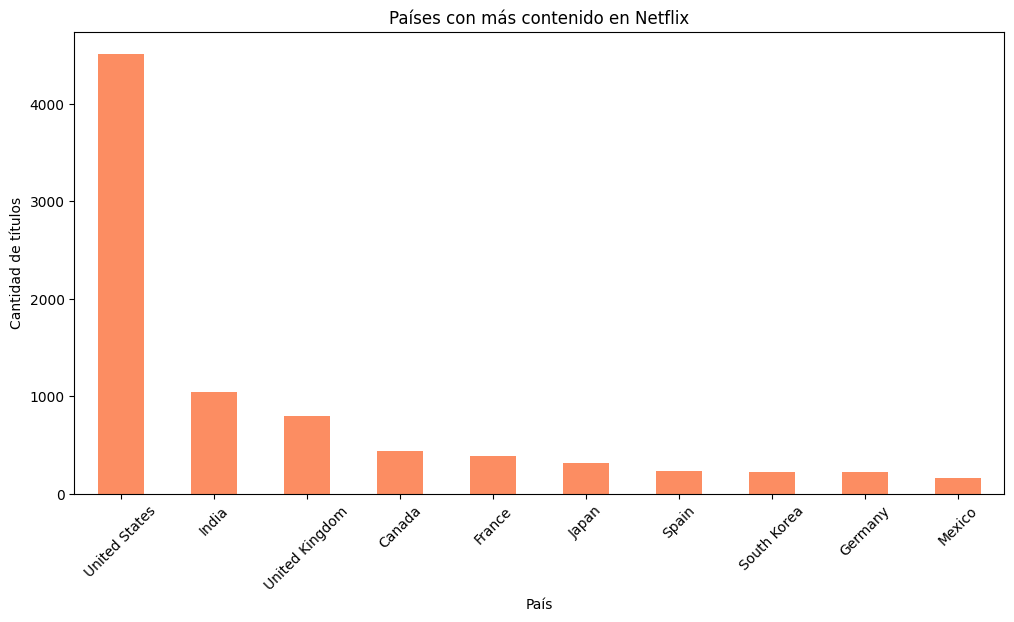

In [52]:
split_country = df['country'].str.split(', ').explode()

countrys = split_country.value_counts()

print(countrys.head(10))

plt.figure(figsize=(12, 6))
countrys.head(10).plot(kind='bar', color='#fc8d62')
plt.title('Países con más contenido en Netflix')
plt.xlabel('País')
plt.ylabel('Cantidad de títulos')
plt.xticks(rotation=45)
plt.show()

## Respuestas parte dos

Directores con más títulos en Netflix:
director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Name: count, dtype: int64


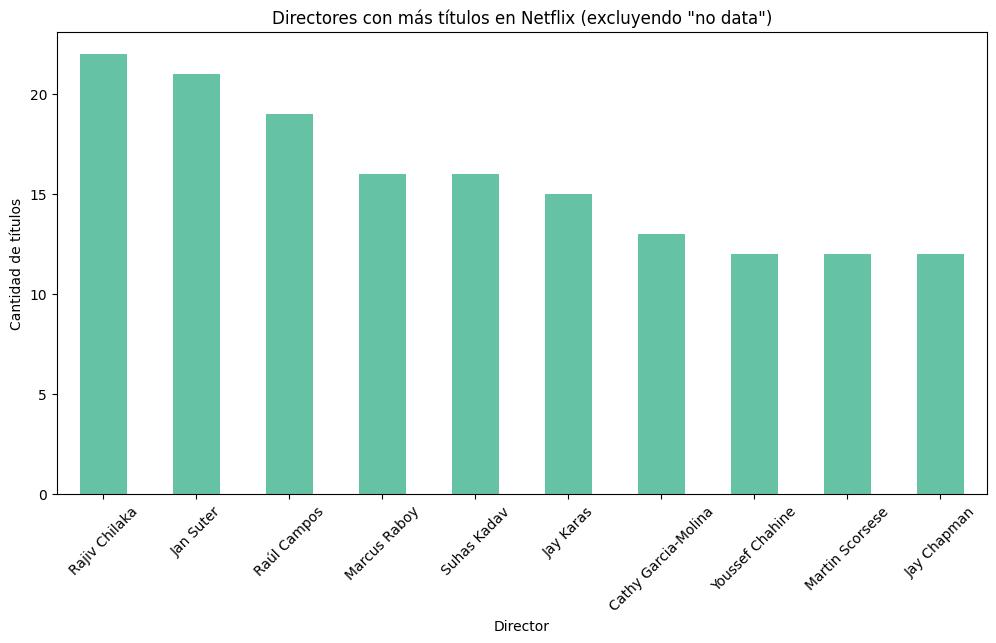

In [60]:
# Filtrar valores "no data" y separar los directores
directores = df[df['director'] != 'No Data']['director'].str.split(', ').explode()

# Contar cuántos títulos tiene cada director
conteo_directores = directores.value_counts()

# Mostrar los directores más prolíficos
print("Directores con más títulos en Netflix:")
print(conteo_directores.head(10))


plt.figure(figsize=(12, 6))
conteo_directores.head(10).plot(kind='bar', color='#66c2a5')
plt.title('Directores con más títulos en Netflix (excluyendo "no data")')
plt.xlabel('Director')
plt.ylabel('Cantidad de títulos')
plt.xticks(rotation=45)
plt.show()

El año con mayor cantidad de títulos añadidos a Netflix es 2019 con 2016 títulos.


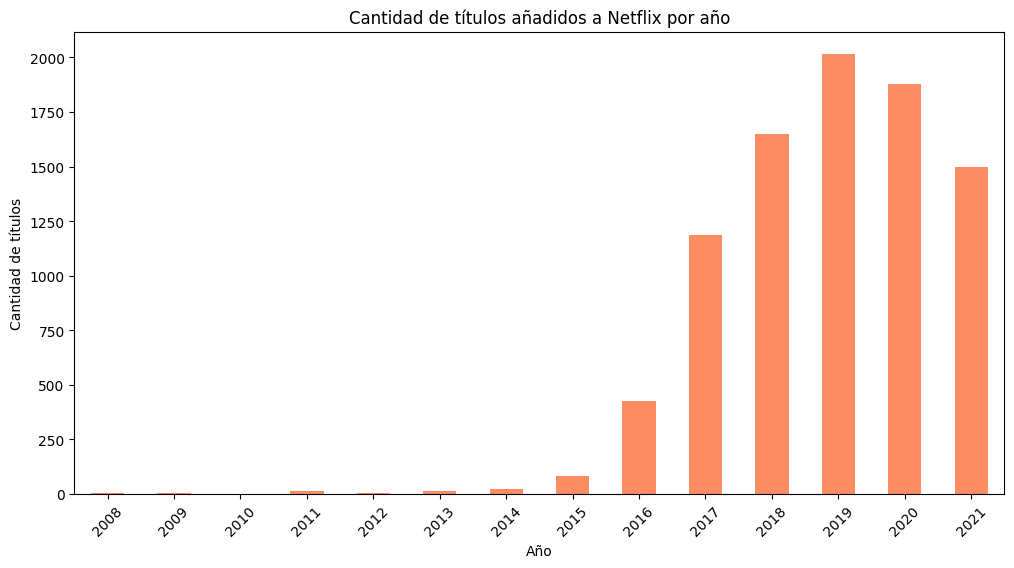

In [64]:
# Contar cuántos títulos se añadieron cada año
conteo_por_anio = df['year_added'].value_counts().sort_index()

# Mostrar el año con más títulos añadidos
anio_max_titulos = conteo_por_anio.idxmax()
max_titulos = conteo_por_anio.max()

print(f"El año con mayor cantidad de títulos añadidos a Netflix es {anio_max_titulos} con {max_titulos} títulos.")

plt.figure(figsize=(12, 6))
conteo_por_anio.plot(kind='bar', color='#fc8d62')
plt.title('Cantidad de títulos añadidos a Netflix por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de títulos')
plt.xticks(rotation=45)
plt.show()

Número de títulos añadidos por año:
year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64


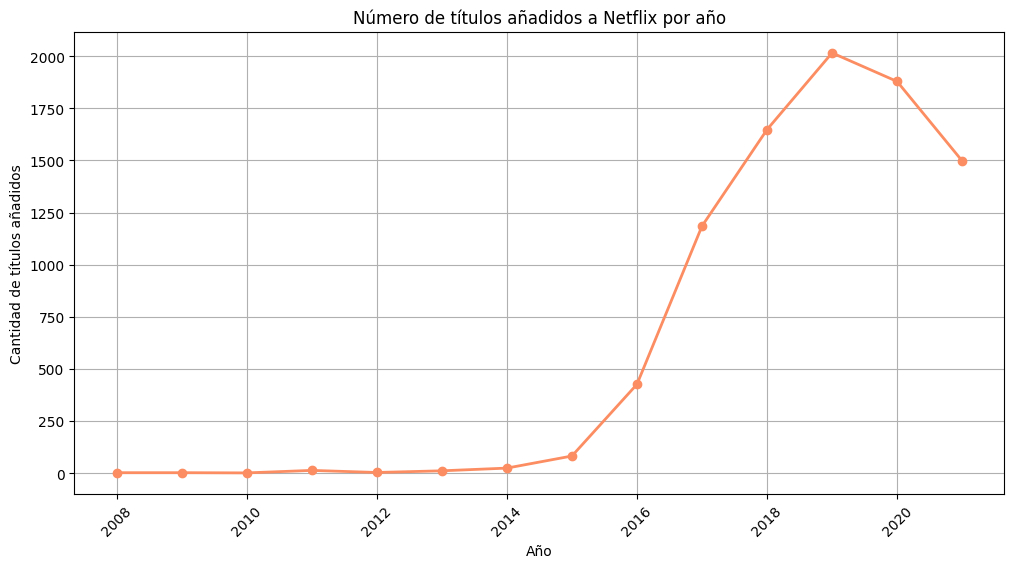

In [65]:
# Contar cuántos títulos se añadieron cada año
conteo_por_anio = df['year_added'].value_counts().sort_index()

# Mostrar los resultados
print("Número de títulos añadidos por año:")
print(conteo_por_anio)


plt.figure(figsize=(12, 6))
conteo_por_anio.plot(kind='line', marker='o', color='#fc8d62', linestyle='-', linewidth=2)
plt.title('Número de títulos añadidos a Netflix por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de títulos añadidos')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [82]:
# Filtrar valores nulos y donde el director es "No Data"
df_clean = df.dropna(subset=['director', 'cast'])
df_clean = df_clean[df_clean['director'] != 'No Data']

# Asegurarse de que la columna 'cast' se trate como lista de actores
df_clean['cast'] = df_clean['cast'].str.split(', ')

# Explode para separar los actores cuando hay múltiples actores por título
df_exploded = df_clean.explode('cast')

# Contar cuántas veces cada director colabora con un actor específico
colaboraciones = df_exploded.groupby(['director', 'cast']).size().reset_index(name='collaborations')

# Filtrar colaboraciones que ocurrieron más de una vez (colaboración recurrente)
colaboraciones_recurrentes = colaboraciones[colaboraciones['collaborations'] > 1]

# Encontrar el director que tiene más colaboraciones recurrentes
director_mas_colaboraciones = colaboraciones_recurrentes.groupby('director')['collaborations'].sum().reset_index()

# Ordenar para ver al director con más colaboraciones
director_mas_colaboraciones_sorted = director_mas_colaboraciones.sort_values(by='collaborations', ascending=False)

# Mostrar los resultados
print("Directores con más colaboraciones recurrentes con actores específicos:")
print(director_mas_colaboraciones_sorted.head(10))  # Mostrar los primeros 10 directores con más colaboraciones

Directores con más colaboraciones recurrentes con actores específicos:
                director  collaborations
337        Rajiv Chilaka             114
451    Toshiya Shinohara              62
375       S.S. Rajamouli              56
68   Cathy Garcia-Molina              55
96          David Dhawan              54
484      Youssef Chahine              53
417           Steve Ball              46
268     Mike Clattenburg              40
331    Quentin Tarantino              38
177              Joey So              38


In [83]:
# Contar cuántos títulos fueron añadidos en cada mes
títulos_por_mes = df['month_name_added'].value_counts().reset_index(name='count')

# Renombrar la columna de 'index' a 'month_name'
títulos_por_mes.columns = ['month_name', 'count']

# Ordenar los resultados por la cantidad de títulos añadidos
títulos_por_mes_sorted = títulos_por_mes.sort_values(by='count', ascending=False)

# Mostrar los resultados
print("Meses con más títulos añadidos a Netflix:")
print(títulos_por_mes_sorted)

Meses con más títulos añadidos a Netflix:
   month_name  count
0        July    827
1    December    812
2   September    769
3       April    763
4     October    760
5      August    754
6       March    741
7     January    737
8        June    728
9    November    705
10        May    632
11   February    562


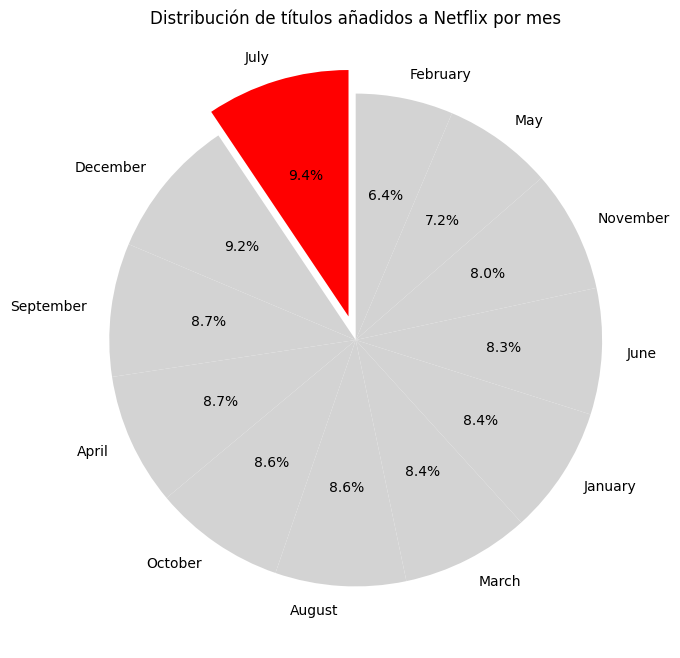

In [ ]:
# Encontrar el mes con la mayor cantidad de títulos
mes_más_títulos = títulos_por_mes_sorted.iloc[0]['month_name']

# Colores personalizados para los segmentos
colores = ['lightgrey' if mes != mes_más_títulos else 'red' for mes in títulos_por_mes_sorted['month_name']]

# Explosión para resaltar el mes con más títulos
explosion = [0.1 if mes == mes_más_títulos else 0 for mes in títulos_por_mes_sorted['month_name']]

# Crear el gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(títulos_por_mes_sorted['count'], labels=títulos_por_mes_sorted['month_name'], autopct='%1.1f%%', colors=colores, explode=explosion, startangle=90)

# Añadir título
plt.title('Distribución de títulos añadidos a Netflix por mes')

# Mostrar el gráfico
plt.show()

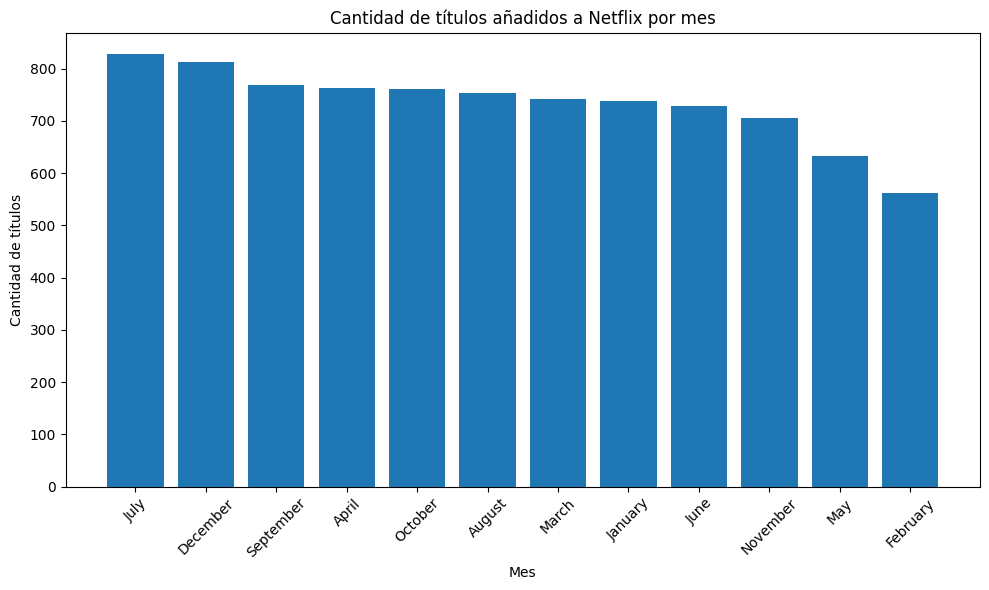

In [80]:
# Crear el gráfico de subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar el conteo de títulos por mes
ax.bar(títulos_por_mes_sorted['month_name'], títulos_por_mes_sorted['count'])

# Rotar las etiquetas del eje X para que no se solapen
plt.xticks(rotation=45)

# Añadir título y etiquetas
ax.set_title('Cantidad de títulos añadidos a Netflix por mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de títulos')

# Mostrar el gráfico
plt.tight_layout()
plt.show()